In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Uploading Data

In [3]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

# Data Cleaning

In [5]:
numerical_features = df.select_dtypes(include='float64')
catagorical_features = df.select_dtypes(include='object')

In [6]:
numerical_features.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
catagorical_features.describe()

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


In [8]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
df['bath']  = df['bath'].astype(float)
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [11]:
df = df.drop(['area_type','availability','society','balcony'],axis='columns')
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df = df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [16]:
df.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [18]:
df[df.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [19]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_Float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df[~df['total_sqft'].apply(is_Float)]['total_sqft'].unique()[:10]

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002'], dtype=object)

In [22]:
def convert_range_to_avg(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return str((float(tokens[0])+float(tokens[1]))/2)
    else:
        return x

In [23]:
df.total_sqft = df.total_sqft.apply(convert_range_to_avg)

In [24]:
df.tail()

,location,size,total_sqft,bath,price,bhk
13315,Whitefield,5 Bedroom,3453,4.0,231.0,5
13316,Richards Town,4 BHK,3600,5.0,400.0,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.0,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.0,4
13319,Doddathoguru,1 BHK,550,1.0,17.0,1


In [25]:
df[~df['total_sqft'].apply(is_Float)].shape[0]

46

In [26]:
df[~df['total_sqft'].apply(is_Float)]['total_sqft'].unique()

array(['34.46Sq. Meter', '4125Perch', '1000Sq. Meter', '1100Sq. Yards',
       '5.31Acres', '30Acres', '716Sq. Meter', '1500Sq. Meter',
       '142.61Sq. Meter', '1574Sq. Yards', '361.33Sq. Yards',
       '117Sq. Yards', '3040Sq. Meter', '500Sq. Yards', '167Sq. Meter',
       '315Sq. Yards', '3Cents', '188.89Sq. Yards', '204Sq. Meter',
       '45Sq. Yards', '133.3Sq. Yards', '78.03Sq. Meter', '122Sq. Yards',
       '84.53Sq. Meter', '2.09Acres', '24Guntha', '697Sq. Meter',
       '1500Cents', '132Sq. Yards', '2Acres', '1100Sq. Meter', '15Acres',
       '1.26Acres', '151.11Sq. Yards', '1Grounds', '2940Sq. Yards',
       '45.06Sq. Meter', '1.25Acres', '86.72Sq. Meter', '38Guntha',
       '6Acres', '120Sq. Yards', '24Sq. Meter', '142.84Sq. Meter',
       '300Sq. Yards'], dtype=object)

In [27]:
def convert_object_to_float(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return str((float(tokens[0])+float(tokens[1]))/2)
    else:
        try:
            return float(x)
        except:
            return None

In [28]:
df.total_sqft = df.total_sqft.apply(convert_object_to_float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
location      13246 non-null object
size          13246 non-null object
total_sqft    13200 non-null float64
bath          13246 non-null float64
price         13246 non-null float64
bhk           13246 non-null int64
dtypes: float64(3), int64(1), object(2)
memory usage: 724.4+ KB


In [30]:
df.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [31]:
df = df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [32]:
df.shape

(13200, 6)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
location      13200 non-null object
size          13200 non-null object
total_sqft    13200 non-null float64
bath          13200 non-null float64
price         13200 non-null float64
bhk           13200 non-null int64
dtypes: float64(3), int64(1), object(2)
memory usage: 721.9+ KB


In [34]:
df = df.drop('size',axis='columns')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 5 columns):
location      13200 non-null object
total_sqft    13200 non-null float64
bath          13200 non-null float64
price         13200 non-null float64
bhk           13200 non-null int64
dtypes: float64(3), int64(1), object(1)
memory usage: 618.8+ KB


## Feature Enginering

In [36]:
df['price_per_sqft'] = df['price']*100000 / df['total_sqft']
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [37]:
df.shape

(13200, 6)

In [38]:
len(df.location.unique())

1298

In [39]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats[:10]

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
Yelahanka                210
Uttarahalli              186
Hebbal                   176
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: location, dtype: int64

In [40]:
len(location_stats[location_stats <= 10])

1047

In [41]:
location_less_then_10 = location_stats[location_stats <= 10]
location_less_then_10.head()

location
Dodsworth Layout    10
BTM 1st Stage       10
Sadashiva Nagar     10
Thyagaraja Nagar    10
Kalkere             10
Name: location, dtype: int64

In [42]:
len(df.location.unique())

1287

In [43]:
# making all names of location having less then 10 values to 'other' as it will help us the train
df.location = df.location.apply(lambda x: 'other' if x in location_less_then_10 else x)
len(df.location.unique())

241

In [44]:
new_location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
new_location_stats.head(10)

location
other              2872
Whitefield          533
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      264
Thanisandra         235
Yelahanka           210
Uttarahalli         186
Hebbal              176
Marathahalli        175
Name: location, dtype: int64

In [45]:
# now we can oberserve the location of 9 the row is now 'Other'
df.head(11)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


## Outlier Detection and Removal

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
location          13200 non-null object
total_sqft        13200 non-null float64
bath              13200 non-null float64
price             13200 non-null float64
bhk               13200 non-null int64
price_per_sqft    13200 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 721.9+ KB


In [47]:
df[df.total_sqft/df.bhk <= 300].shape

(926, 6)

In [48]:
df[df.total_sqft/df.bhk > 300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [49]:
df = df[~(df.total_sqft/df.bhk <= 300)]
df.shape

(12274, 6)

In [50]:
df.price_per_sqft.describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

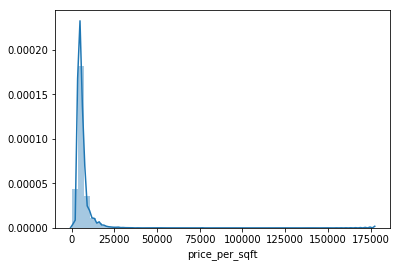

In [51]:
sns.distplot(df['price_per_sqft'],kde=True)

In [52]:
def remove_price_outlier(data):
    df_out = pd.DataFrame()
    for key , subdf in data.groupby('location'):
        m  = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[ (subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))  ]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [53]:
test = remove_price_outlier(df)
test.head()
test = df

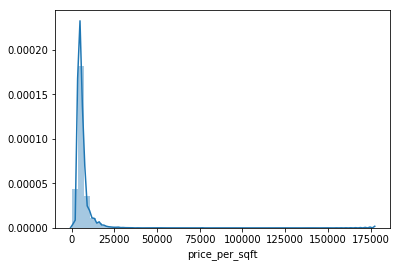

In [54]:
sns.distplot(test['price_per_sqft'],kde=True)

In [55]:
test.shape

(12274, 6)

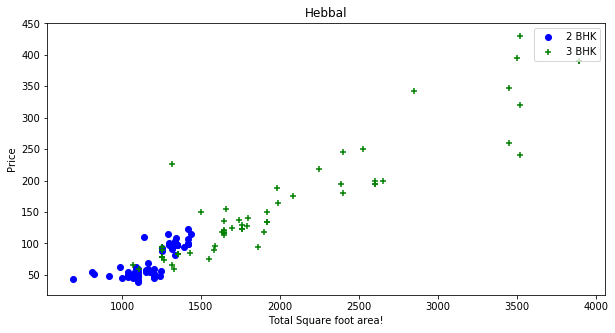

In [56]:
# trying to visualize the problem of having price of 2BHK greater then 3BHK
def plot_scatter_plot(df,location):
    bhk2 = df[ (df.location==location) & (df.bhk == 2)]
    bhk3 = df[ (df.location==location) & (df.bhk == 3)]
    plt.rcParams['figure.figsize'] = (10,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK')
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK')
    plt.xlabel('Total Square foot area!')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
plot_scatter_plot(df,'Hebbal')

In [57]:
# this function is for removing the above problem
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        print(location)
        for bhk , bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        print(bhk_stats)
        for bhk , bhk_df in location_df.groupby('bhk'):  
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [58]:
test = remove_bhk_outliers(df)

1st Block Jayanagar
{2: {'mean': 8991.902834008097, 'std': 2991.9028340080968, 'count': 2}, 3: {'mean': 10450.649516638781, 'std': 2341.442149280999, 'count': 4}, 4: {'mean': 15951.533460274062, 'std': 1615.6957599256682, 'count': 4}}
1st Phase JP Nagar
{1: {'mean': 5952.380952380952, 'std': 0.0, 'count': 1}, 2: {'mean': 7931.806799837383, 'std': 1534.1422783514054, 'count': 8}, 3: {'mean': 9151.192151725822, 'std': 1054.731726021645, 'count': 7}, 4: {'mean': 10916.59953085162, 'std': 6015.260686226977, 'count': 4}, 5: {'mean': 15909.09090909091, 'std': 0.0, 'count': 1}}
2nd Phase Judicial Layout
{1: {'mean': 4952.380952380952, 'std': 0.0, 'count': 1}, 2: {'mean': 4138.888888888889, 'std': 657.9288490181673, 'count': 4}, 3: {'mean': 3837.9627511096874, 'std': 533.1504772812877, 'count': 6}}
2nd Stage Nagarbhavi
{4: {'mean': 12620.37037037037, 'std': 4022.3462739208694, 'count': 4}, 5: {'mean': 6000.0, 'std': 0.0, 'count': 1}, 6: {'mean': 16891.666666666668, 'std': 1858.333333333333, 'c

{2: {'mean': 3075.420009891799, 'std': 519.2362152374388, 'count': 16}, 3: {'mean': 3184.8485914885487, 'std': 494.8119448473696, 'count': 10}}
Bommenahalli
{3: {'mean': 8565.382032363164, 'std': 1314.9620051314946, 'count': 3}, 4: {'mean': 18274.23300656536, 'std': 23792.345401209608, 'count': 7}}
Brookefield
{2: {'mean': 5728.237706075875, 'std': 1001.2535378653855, 'count': 20}, 3: {'mean': 6800.463995125069, 'std': 2861.203651912975, 'count': 15}, 4: {'mean': 8316.27418236138, 'std': 3910.949936141365, 'count': 9}, 5: {'mean': 11258.01282051282, 'std': 2283.6538461538457, 'count': 2}, 8: {'mean': 10740.74074074074, 'std': 0.0, 'count': 1}}
Budigere
{1: {'mean': 5018.968689658322, 'std': 741.2376728007406, 'count': 7}, 2: {'mean': 5087.792958881237, 'std': 322.74487526825874, 'count': 24}, 3: {'mean': 4995.78214595029, 'std': 304.7321376982579, 'count': 22}}
CV Raman Nagar
{1: {'mean': 7588.652482269504, 'std': 496.45390070921985, 'count': 2}, 2: {'mean': 4923.84685993315, 'std': 10

Harlur
{2: {'mean': 5905.321437094385, 'std': 965.8883815424059, 'count': 35}, 3: {'mean': 6875.97239444406, 'std': 1144.5205252626406, 'count': 36}, 4: {'mean': 6806.220763959648, 'std': 749.5046631700119, 'count': 6}}
Hebbal
{2: {'mean': 5950.594020055752, 'std': 1483.4649972459722, 'count': 62}, 3: {'mean': 7550.905316657779, 'std': 1954.3773000272206, 'count': 73}, 4: {'mean': 8922.397508035661, 'std': 1970.2220715238147, 'count': 37}, 7: {'mean': 22916.666666666668, 'std': 0.0, 'count': 1}, 8: {'mean': 3666.6666666666665, 'std': 0.0, 'count': 1}}
Hebbal Kempapura
{2: {'mean': 6994.817858872716, 'std': 2222.7443176215875, 'count': 7}, 3: {'mean': 8939.347092720993, 'std': 1714.3660575834883, 'count': 15}, 4: {'mean': 10197.617947603585, 'std': 2054.0203993520936, 'count': 6}, 5: {'mean': 8320.802005012532, 'std': 373.56532189325577, 'count': 3}}
Hegde Nagar
{2: {'mean': 5829.271033728784, 'std': 991.4476409507629, 'count': 6}, 3: {'mean': 6789.773280916624, 'std': 1224.350404162218

{1: {'mean': 6393.44262295082, 'std': 0.0, 'count': 1}, 2: {'mean': 4607.1537169633775, 'std': 1232.3707147114767, 'count': 20}, 3: {'mean': 6574.978708074438, 'std': 1694.5705229700118, 'count': 12}}
Kalyan nagar
{2: {'mean': 5331.512234095648, 'std': 1467.506777680515, 'count': 10}, 3: {'mean': 5403.789409758371, 'std': 1008.9411534967034, 'count': 5}, 4: {'mean': 7043.982789343301, 'std': 850.7540527619626, 'count': 2}, 6: {'mean': 13333.333333333334, 'std': 0.0, 'count': 1}}
Kambipura
{2: {'mean': 4650.41053227633, 'std': 575.2793514872033, 'count': 16}, 3: {'mean': 4701.428820128929, 'std': 474.2304917944777, 'count': 8}}
Kammanahalli
{1: {'mean': 8428.57142857143, 'std': 0.0, 'count': 1}, 2: {'mean': 6004.127481713689, 'std': 900.0939698288161, 'count': 5}, 4: {'mean': 11650.702426564496, 'std': 3585.6721001144583, 'count': 3}, 5: {'mean': 6962.25766229163, 'std': 2041.3437782846004, 'count': 2}}
Kammasandra
{1: {'mean': 2916.3934426229507, 'std': 116.39344262295072, 'count': 2},

Mallasandra
{2: {'mean': 5451.438079928411, 'std': 1966.1403739639961, 'count': 9}, 3: {'mean': 5557.259722141612, 'std': 756.1882822123313, 'count': 5}, 4: {'mean': 3149.171270718232, 'std': 0.0, 'count': 1}}
Malleshpalya
{2: {'mean': 4450.0450218933265, 'std': 715.3637519675409, 'count': 10}, 3: {'mean': 7088.912608141258, 'std': 3832.179322032174, 'count': 6}, 4: {'mean': 9645.061728395061, 'std': 0.0, 'count': 1}}
Malleshwaram
{1: {'mean': 10574.590792191524, 'std': 2309.1199297340045, 'count': 5}, 2: {'mean': 9321.218966140648, 'std': 1872.5091946574225, 'count': 11}, 3: {'mean': 12594.424116391494, 'std': 2209.476405831672, 'count': 23}, 4: {'mean': 19600.284772698567, 'std': 7561.576027559083, 'count': 7}, 5: {'mean': 26333.333333333336, 'std': 3666.666666666666, 'count': 2}, 7: {'mean': 18035.509736540662, 'std': 9892.793123726453, 'count': 3}}
Marathahalli
{1: {'mean': 6443.713889143229, 'std': 707.710000973837, 'count': 5}, 2: {'mean': 5520.126609329436, 'std': 1234.872970318

Rayasandra
{1: {'mean': 4045.9019473471503, 'std': 702.8119840003642, 'count': 3}, 2: {'mean': 4746.478354474935, 'std': 569.7266805922895, 'count': 4}, 3: {'mean': 4556.514582536394, 'std': 373.157988966733, 'count': 11}, 4: {'mean': 4449.648711943794, 'std': 0.0, 'count': 1}, 5: {'mean': 4027.777777777778, 'std': 0.0, 'count': 1}}
Sahakara Nagar
{2: {'mean': 5484.472012300181, 'std': 1617.110518593213, 'count': 20}, 3: {'mean': 8930.586968787802, 'std': 4032.5286048633575, 'count': 13}, 4: {'mean': 7445.229681978799, 'std': 554.7703180212015, 'count': 2}}
Sanjay nagar
{1: {'mean': 3316.062176165803, 'std': 0.0, 'count': 1}, 2: {'mean': 6408.0027636555515, 'std': 1008.5806527993847, 'count': 9}, 3: {'mean': 8982.68300060496, 'std': 2560.0905752403655, 'count': 6}, 4: {'mean': 12962.962962962964, 'std': 0.0, 'count': 1}, 5: {'mean': 7575.757575757576, 'std': 0.0, 'count': 1}}
Sarakki Nagar
{2: {'mean': 8250.0, 'std': 0.0, 'count': 1}, 3: {'mean': 11677.772648686641, 'std': 1164.2113099

In [59]:
test.shape
df = test


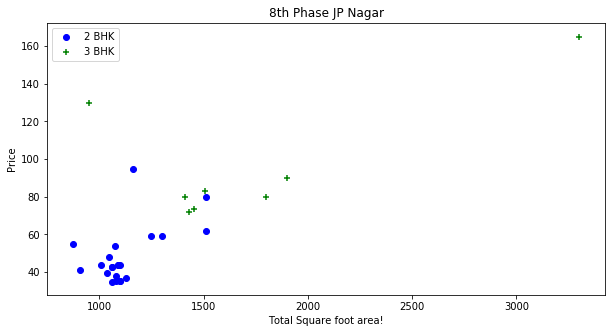

In [60]:
plot_scatter_plot(test,'8th Phase JP Nagar')

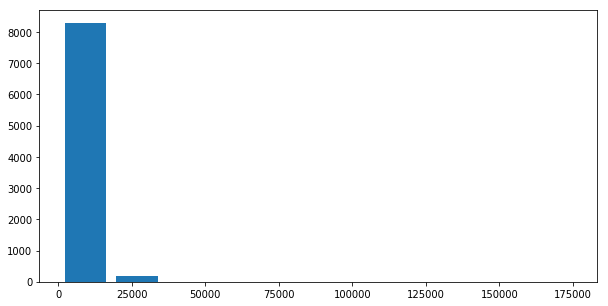

In [61]:
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.show()

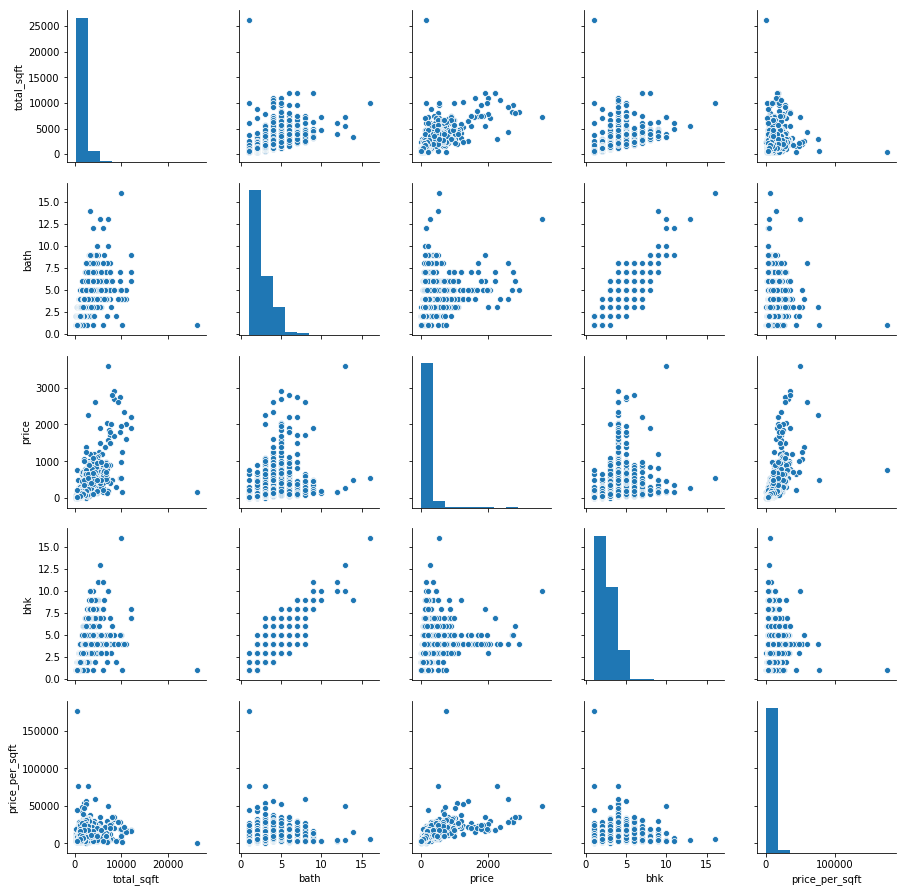

In [62]:
sns.pairplot(df)

In [63]:
df.bath.unique()

array([ 2.,  3.,  4.,  5.,  1.,  8.,  6.,  7.,  9., 14., 16., 10., 12.,
       13.])

In [64]:
df = df[df.bath < 10]

In [65]:
df.shape

(8484, 6)

(array([ 682., 4500., 2113.,  716.,    0.,  286.,  122.,   34.,   20.,
          11.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

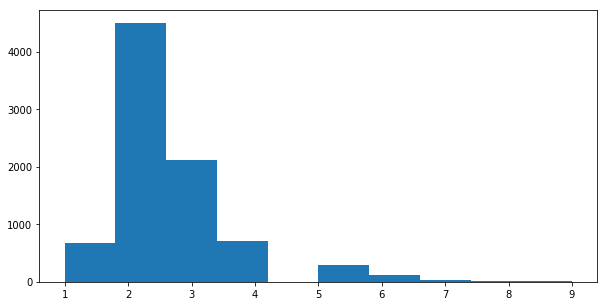

In [66]:
plt.hist(df.bath)

In [67]:
df[df.bath > df.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
6838,Rajaji Nagar,7500.0,8.0,1700.0,5,22666.666667
7709,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
9974,other,2400.0,6.0,775.0,3,32291.666667
11366,Nagasandra,7000.0,8.0,450.0,4,6428.571429
12103,Thanisandra,1806.0,6.0,116.0,3,6423.034330
12443,other,4350.0,8.0,2600.0,4,59770.114943


In [68]:
df = df[df.bath < df.bhk+2]
df.shape

(8362, 6)

{'whiskers': [<matplotlib.lines.Line2D at 0x1eeea38fda0>,
 'caps': [<matplotlib.lines.Line2D at 0x1eeea39a470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eeea38f9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1eeea39ab00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eeea39ae48>],
 'means': []}

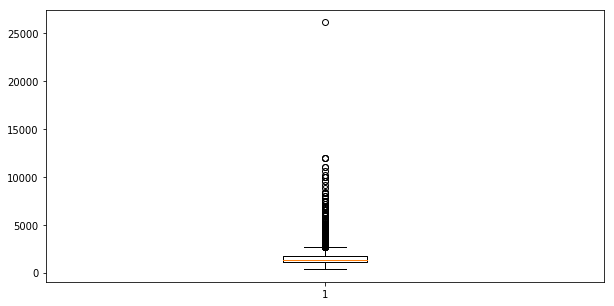

In [69]:
plt.boxplot(x='total_sqft',data=df)

In [70]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,8362.000000,8362.000000,8362.000000,8362.000000,8362.000000
mean,1559.917797,2.490074,121.550798,2.551064,6860.681221
std,942.365295,0.998005,158.799224,0.962936,4487.631862
min,340.000000,1.000000,9.000000,1.000000,500.000000
25%,1100.000000,2.000000,50.000000,2.000000,4576.463587
50%,1289.500000,2.000000,77.000000,2.000000,5865.921788
75%,1730.000000,3.000000,127.000000,3.000000,7500.000000
max,26136.000000,9.000000,2912.000000,11.000000,176470.588235


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8362 entries, 0 to 13319
Data columns (total 6 columns):
location          8362 non-null object
total_sqft        8362 non-null float64
bath              8362 non-null float64
price             8362 non-null float64
bhk               8362 non-null int64
price_per_sqft    8362 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 457.3+ KB


In [72]:
df.total_sqft.unique

<bound method Series.unique of 0        1056.00
2        1440.00
3        1521.00
4        1200.00
6        2732.00
7        3300.00
11       2785.00
12       1000.00
13       1100.00
14       2250.00
15       1175.00
16       1180.00
18       2770.00
20        600.00
21       1755.00
22       2800.00
23       1767.00
24        510.00
27       1610.00
28       1151.00
29       1025.00
30       2475.00
32       1760.00
34       1925.00
37       1724.00
39       1143.00
40       1296.00
42        600.00
43        660.00
44       1330.74
          ...   
13273     510.00
13274    1153.00
13276    1000.00
13280    1425.00
13282    1919.00
13283    2111.00
13284     970.00
13285    1353.00
13287    1285.00
13288    1050.00
13289    1349.00
13290    4050.00
13291     812.00
13293    2425.00
13294    2200.00
13295    1810.00
13296    1200.00
13298    1015.00
13301    1454.00
13304    1187.00
13305     500.00
13307    1805.00
13308    1527.00
13312    1262.00
13313    1345.00
13314    1715.00


In [73]:
df = df[df.total_sqft < 15000]

{'whiskers': [<matplotlib.lines.Line2D at 0x1eeea3eff28>,
 'caps': [<matplotlib.lines.Line2D at 0x1eeea3f75f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eeea3efb38>],
 'medians': [<matplotlib.lines.Line2D at 0x1eeea3f7c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eeea3f7fd0>],
 'means': []}

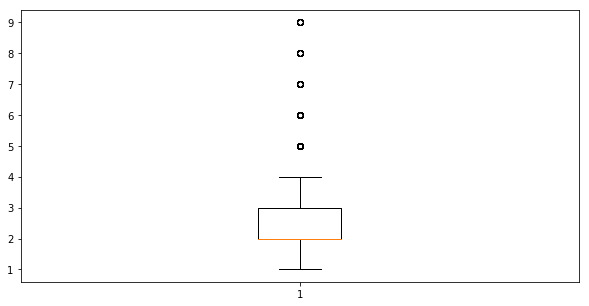

In [74]:
plt.boxplot(x='bath',data=df)

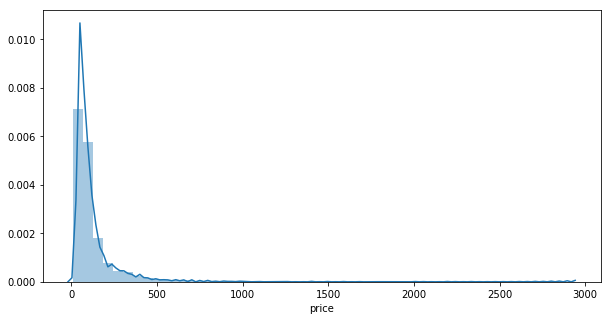

In [75]:
sns.distplot(df['price'],kde=True)

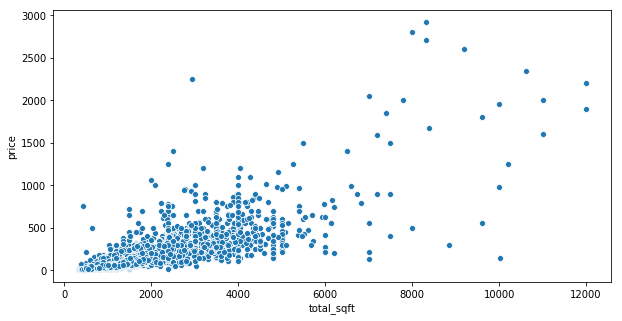

In [76]:
sns.scatterplot(x='total_sqft',y='price',data=df)

In [77]:
df[df.price > 2000]

,location,total_sqft,bath,price,bhk,price_per_sqft
408,Rajaji Nagar,12000.0,6.0,2200.0,7,18333.333333
605,Malleshwaram,12000.0,7.0,2200.0,7,18333.333333
3180,other,8321.0,5.0,2700.0,5,32448.023074
4162,other,7000.0,5.0,2050.0,4,29285.714286
6421,Bommenahalli,2940.0,3.0,2250.0,4,76530.612245
10304,other,10624.0,4.0,2340.0,4,22025.602410
11080,other,8321.0,5.0,2912.0,4,34995.793775
13197,other,9200.0,4.0,2600.0,4,28260.869565
13200,other,8000.0,6.0,2800.0,6,35000.000000


In [78]:
df = df.drop(index=6421,axis='index')

In [79]:
df[df.price > 2000]

,location,total_sqft,bath,price,bhk,price_per_sqft
408,Rajaji Nagar,12000.0,6.0,2200.0,7,18333.333333
605,Malleshwaram,12000.0,7.0,2200.0,7,18333.333333
3180,other,8321.0,5.0,2700.0,5,32448.023074
4162,other,7000.0,5.0,2050.0,4,29285.714286
10304,other,10624.0,4.0,2340.0,4,22025.602410
11080,other,8321.0,5.0,2912.0,4,34995.793775
13197,other,9200.0,4.0,2600.0,4,28260.869565
13200,other,8000.0,6.0,2800.0,6,35000.000000


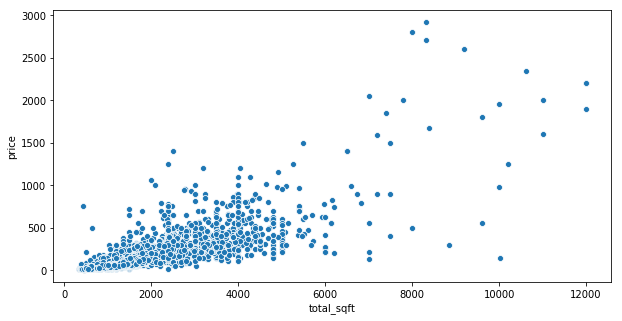

In [80]:
sns.scatterplot(x='total_sqft',y='price',data=df)

In [81]:
df.price_per_sqft.describe()

count      8360.000000
mean       6853.099502
std        4422.464591
min         500.000000
25%        4578.447364
50%        5865.921788
75%        7500.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

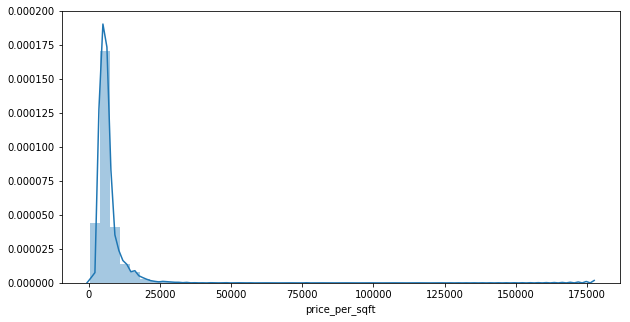

In [82]:
sns.distplot(df.price_per_sqft,kde=True)

In [83]:
df[df.price_per_sqft > 50000]

,location,total_sqft,bath,price,bhk,price_per_sqft
7088,other,650.0,1.0,500.0,1,76923.076923
7657,other,425.0,1.0,750.0,1,176470.588235
7883,other,2000.0,3.0,1063.0,4,53150.000000
8398,Bannerghatta Road,2500.0,4.0,1400.0,5,56000.000000
9535,Indira Nagar,2400.0,5.0,1250.0,4,52083.333333


In [84]:
df = df.drop(index=7657,axis='index')

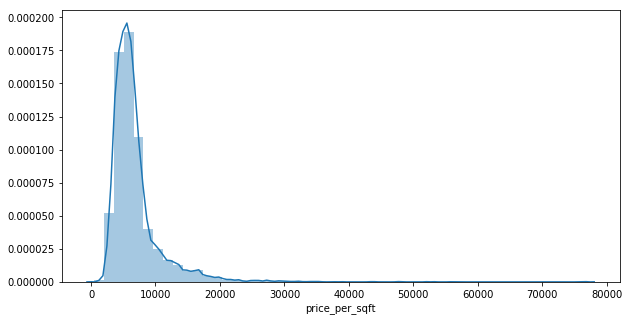

In [85]:
sns.distplot(df.price_per_sqft,kde=True)

In [86]:
df = df[df.price_per_sqft < 40000]

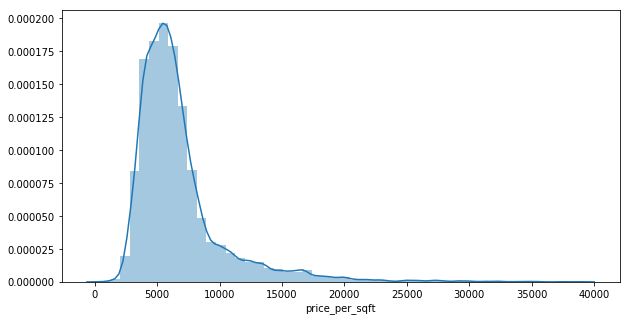

In [87]:
sns.distplot(df.price_per_sqft,kde=True)

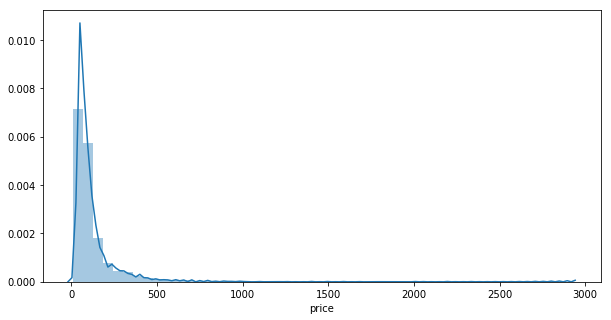

In [88]:
sns.distplot(df.price,kde=True)

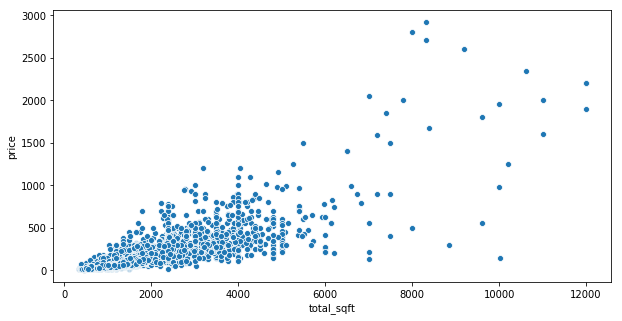

In [89]:
sns.scatterplot(x='total_sqft',y='price',data=df)

In [90]:
# finding mean and median of price per square feet grouping location
def searching(df):
    for location , location_df in df.groupby('location'):
        mean = location_df.price_per_sqft.mean()
        median = location_df.price_per_sqft.median()
        if(abs(mean-median) > 3000):
            print(location," : ",mean," - ",median)

In [91]:
searching(df)

2nd Stage Nagarbhavi  :  11296.296296296296  -  14666.666666666666
Chamrajpet  :  11541.999664345936  -  8541.480820695808
Poorna Pragna Layout  :  7796.451322127612  -  4636.503153863483


In [92]:
df[df.location == 'Poorna Pragna Layout']

,location,total_sqft,bath,price,bhk,price_per_sqft
1399,Poorna Pragna Layout,920.0,2.0,39.55,2,4298.913043
2921,Poorna Pragna Layout,1160.0,2.0,46.39,2,3999.137931
4272,Poorna Pragna Layout,965.0,2.0,48.00,2,4974.093264
5304,Poorna Pragna Layout,1400.0,2.0,240.00,3,17142.857143
7463,Poorna Pragna Layout,1160.0,2.0,46.39,2,3999.137931
7589,Poorna Pragna Layout,2400.0,6.0,450.00,7,18750.000000
8365,Poorna Pragna Layout,1160.0,2.0,46.39,2,3999.137931
11941,Poorna Pragna Layout,960.0,2.0,50.00,2,5208.333333


In [93]:
locaiton_with_low_price = ['2nd Stage Nagarbhavi','Chamrajpet','Poorna Pragna Layout']
df = df.drop(index=[5304,7589])

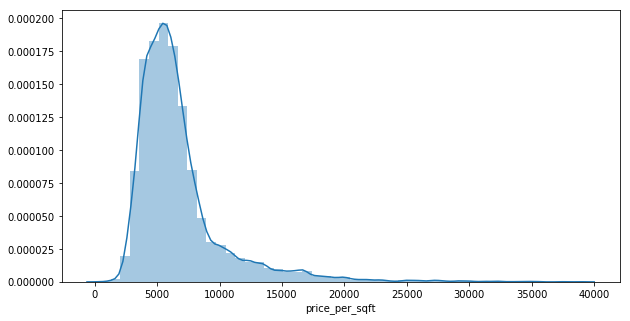

In [94]:
sns.distplot(df.price_per_sqft,kde=True)

In [95]:
df.corr()['price']

total_sqft        0.808764
bath              0.556367
price             1.000000
bhk               0.537932
price_per_sqft    0.756180
Name: price, dtype: float64

In [96]:
df = df[df.price_per_sqft < 20000]

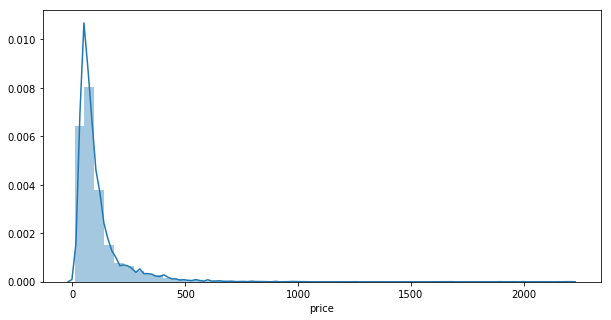

In [97]:
sns.distplot(df.price,kde=True)

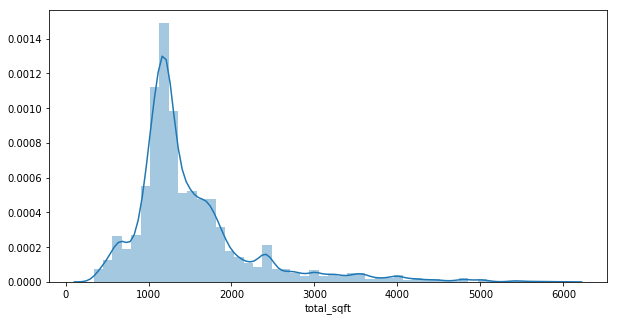

In [98]:
df = df[df.total_sqft < 6000]
sns.distplot(df.total_sqft,kde=True)

## One Hot Coding

In [99]:
dumies = pd.get_dummies(df.location)
dumies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
new_df = pd.concat([df,dumies.drop('other',axis='columns')],axis='columns')
new_df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8193 entries, 0 to 13319
Columns: 246 entries, location to Yeshwanthpur
dtypes: float64(4), int64(1), object(1), uint8(240)
memory usage: 2.3+ MB


In [102]:
new_df  = new_df.drop(['price_per_sqft','location'],axis='columns')

In [103]:
new_df.shape

(8193, 244)

In [104]:
X = new_df.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
y = new_df.price
y.head()

0     39.07
2     62.00
3     95.00
4     51.00
6    204.00
Name: price, dtype: float64

In [106]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [107]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.816229579085028

In [108]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return regressor.predict([x])[0]

In [109]:
import pickle
with open('banglore_price_model.pickle','wb') as f:
    pickle.dump(regressor,f)

In [110]:
predict_price('2nd Stage Nagarbhavi',1000,2,2)

82.98099138588901

In [111]:
predict_price('Indira Nagar',1000,2,2)
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101


In [112]:
import json
columns = {
    'data_columns' : [col.lower() for col in X_train.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))

In [113]:
pickle.format_version

'4.0'

In [114]:
regressor.__version__

AttributeError: 'LinearRegression' object has no attribute '__version__'

In [115]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8193 entries, 0 to 13319
Columns: 244 entries, total_sqft to Yeshwanthpur
dtypes: float64(3), int64(1), uint8(240)
memory usage: 2.2 MB


In [123]:
range_data = {
    'bath': [int(new_df.bath.min()) , int(new_df.bath.max()) ],
    'bhk' : [int(new_df.bhk.min()) , int(new_df.bhk.max())]
}
range_data

{'bath': [1, 9], 'bhk': [1, 11]}

In [124]:
with open('numerical_range.json','w') as f:
    f.write(json.dumps(range_data))